In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed


from numpy import cos,sin,pi,tan,log,exp,array,linspace,arange
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
# from mpl_toolkits.mplot3d.art3d import Poly3DCollection


plt.rcParams["figure.figsize"] = [7,7]

from numpy.linalg import norm

%matplotlib inline

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

#### Quick exercise

What is the derivative of the parametrized line $$\vec r(t) = \vec p + t \vec v ?$$

##### Solution

$\vec v$

#### 
<div style="padding-bottom: 40%"></div>

## Examples

  1. Show that any moving particle that changes direction has a nonzero acceleration.
  

#### Solution 

If $\vec a(t) = \vec 0$, then $\vec v(t)$ is a constant and thus cannot change direction.
  

###   
  2. Is the converse true (i.e., a particle with nonzero acceleration must change direction?
  

#### Solution 

No. Take a particle speeding up along a straigt line like $\langle e^t, e^t, e^t \rangle$. Its velocity is always a scalar multiple of $\langle 1,1,1 \rangle$ but its acceleration is clearly not $\vec 0$.

### <div style="padding-bottom: 40%"></div>

## Example

A particle initially at rest at the origin is subjected to an acceleration $$\vec a(t) = \begin{cases} \vec i -  t\,\vec j, & t\leq 6 \\ \vec 0, & t > 6 \end{cases}.$$ Find its position at $t=10$.

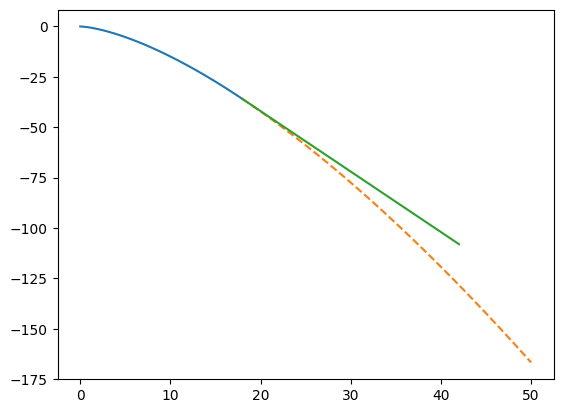

In [2]:
t = np.linspace(0,6,201)
plt.plot(1/2*t**2,-t**3/6)
t = np.linspace(6,10,201)
plt.plot(1/2*t**2,-t**3/6,'--')
plt.plot(18 + 6*(t-6),-36 - 18*(t-6),'-');


#### Solution

$$\vec v(t) = \int_0^t \vec a(\tau)\,d\tau  = \begin{cases} t\,\vec i -  \frac{t^2}{2}\,\vec j, & t\leq 6 \\ \vec v(6), & t > 6 \end{cases} $$

$$= \begin{cases} t\,\vec i -  \frac{t^2}{2}\,\vec j, & t\leq 6 \\ 6\,\vec i - 18\,\vec j, & t > 6 \end{cases}$$

$$\vec x(t) = \int_0^t \vec v(\tau)\,d\tau  = \begin{cases} \frac{t^2}{2}\,\vec i -  \frac{t^3}{6}\,\vec j, & t\leq 6 \\ \vec x(6) + \vec v(6)(t - 6), & t > 6 \end{cases} $$

$$=\begin{cases} \frac{t^2}{2}\,\vec i -  \frac{t^3}{6}\,\vec j, & t\leq 6 \\ (6t - 18)\vec i + (72 - 18t)\vec j, & t > 6 \end{cases}$$

In [4]:
from scipy.integrate import quad

def a(t):
    if t <= 6:
        return np.array((1, -t))
    else:
        return np.zeros(2)

def v(t):
    if t <= 6:
        return np.array((t, -t**2/2))
    else:
        return np.array((6, -18))

def r(t):
    if t <= 6:
        return np.array((t**2/2, -t**3/6))
    else:
        return np.array((6*t - 18, 72 - 18*t))


fig, ax = plt.subplots()

ax.set_xlim(0, 50)
ax.set_ylim(-175, 0)

p1 = ax.plot([],[],'--')[0]
p2 = ax.plot([],[],'r-')[0]
p3 = ax.plot([],[],'b-')[0]

tt = ax.text(40, -10, f"$ t = {0:.1f}$")
sc = ax.scatter(r(6)[0], r(6)[1], s=50, color='y', alpha=0)

ts = np.linspace(0, 1, 200)

q = ax.quiver(0, 0, 1, 0, color='y', scale_units='xy', scale=1, angles='xy') 

def update(T):
    tt.set_text(f"$ t = {T:.1f}$")
    while len(ax.collections) > 1:
        ax.collections.pop()
    # q = ax.quiver(r(T)[0], r(T)[1], v(T)[0], v(T)[1], color='y', scale_units='xy', scale=1, angles='xy')
    # q2 = ax.quiver(r(T)[0], r(T)[1], a(T)[0], a(T)[1], color='g', scale_units='xy', scale=1/4, angles='xy')

    if T <= 6:
        p2.set_data(*np.column_stack([r(t*T) for t in ts]))
    else:
        sc.set_alpha(np.max([7 - T, 0]))
        xs, ys = np.column_stack([r(t) for t in (6 + (T - 6)*ts)])
        p3.set_data(xs, ys)
        t = np.linspace(6,T,201)
        p1.set_data(1/2*t**2,-t**3/6)
    
anim = FuncAnimation(fig, update, frames=linspace(0,10,241), interval=1000/24);

plt.close(fig)
HTML(anim.to_html5_video())
# plt.show(anim)

<div style="padding-bottom: 40%"></div>